## Name: Martin Zanaj
### SI 670 Applied Machine Learning, Week 2:  Basic supervised learning concepts (Due 09/21 11:59pm)

For this assignment, you will be exercising on questions related to linear regression, polynomial feature expansion, underfitting/overfitting, and cross-validation.

There are six questions, for a total of 100 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw2-youruniqname.ipynb and be sure to put your name at the top of your notebook file.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.

### Preliminary
First, run the following block to set up the variables needed for later sections.

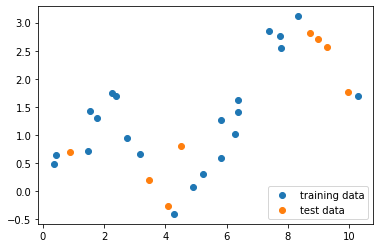

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 30
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) / 3


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
part1_scatter()

### Question 1 (20 points)

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="si670f18_assn2_q1.png" style="width: 200px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [ ]:
def answer_one():  
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Perhaps, a for loop would have been better
    #Polynomial expansion
    poly1 = PolynomialFeatures(degree=1)
    poly3 = PolynomialFeatures(degree=3)
    poly6 = PolynomialFeatures(degree=6)
    poly9 = PolynomialFeatures(degree=9)

    #Applying standardization & reshaping(was giving an error!)
    X_train1 = poly1.fit_transform(X_train.reshape(-1, 1))
    X_train3 = poly3.fit_transform(X_train.reshape(-1, 1))
    X_train6 = poly6.fit_transform(X_train.reshape(-1, 1))
    X_train9 = poly9.fit_transform(X_train.reshape(-1, 1))

    #Fit the model
    linreg1 = LinearRegression().fit(X_train1, y_train)
    linreg3 = LinearRegression().fit(X_train3, y_train)
    linreg6 = LinearRegression().fit(X_train6, y_train)
    linreg9 = LinearRegression().fit(X_train9, y_train)

    #Test data on 100 x=0 , x=10
    test_data1= poly1.fit_transform(np.linspace(0,10,100).reshape(-1,1))
    test_data3= poly3.fit_transform(np.linspace(0,10,100).reshape(-1,1))
    test_data6= poly6.fit_transform(np.linspace(0,10,100).reshape(-1,1))
    test_data9= poly9.fit_transform(np.linspace(0,10,100).reshape(-1,1))

    #Prediction
    y_pred1 = linreg1.predict(test_data1)
    y_pred3 = linreg3.predict(test_data3)
    y_pred6 = linreg6.predict(test_data6)
    y_pred9 = linreg9.predict(test_data9)

    #Reshape into 1 x 100
    y_pred1=y_pred1.reshape(1,100)
    y_pred3=y_pred3.reshape(1,100)
    y_pred6=y_pred6.reshape(1,100)
    y_pred9=y_pred9.reshape(1,100)

    #Put all the different numpy arrays in one matrix
    res= np.zeros(shape=(4,100))
    res[0]= y_pred1
    res[1]= y_pred3
    res[2]= y_pred6
    res[3]= y_pred9

    return res

answer_one()

array([[ 0.60560647,  0.62384827,  0.64209007,  0.66033187,  0.67857367,
         0.69681547,  0.71505727,  0.73329907,  0.75154087,  0.76978267,
         0.78802447,  0.80626626,  0.82450806,  0.84274986,  0.86099166,
         0.87923346,  0.89747526,  0.91571706,  0.93395886,  0.95220066,
         0.97044246,  0.98868425,  1.00692605,  1.02516785,  1.04340965,
         1.06165145,  1.07989325,  1.09813505,  1.11637685,  1.13461865,
         1.15286045,  1.17110225,  1.18934404,  1.20758584,  1.22582764,
         1.24406944,  1.26231124,  1.28055304,  1.29879484,  1.31703664,
         1.33527844,  1.35352024,  1.37176204,  1.39000383,  1.40824563,
         1.42648743,  1.44472923,  1.46297103,  1.48121283,  1.49945463,
         1.51769643,  1.53593823,  1.55418003,  1.57242183,  1.59066362,
         1.60890542,  1.62714722,  1.64538902,  1.66363082,  1.68187262,
         1.70011442,  1.71835622,  1.73659802,  1.75483982,  1.77308162,
         1.79132341,  1.80956521,  1.82780701,  1.8

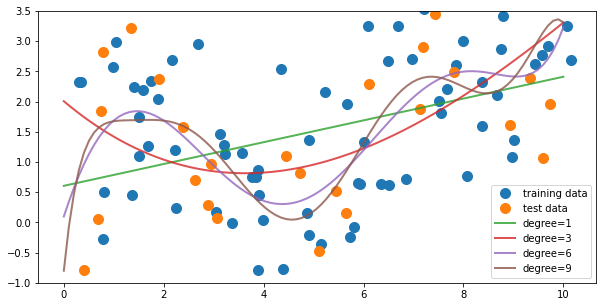

In [ ]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,3.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2 (20 points)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

Based on the $R^2$ scores above (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

(Hint: you can plot the r2_train and r2_test vs the degree to investigate underfitting/overfitting.)

*This function should return one tuple of numpy arrays `(r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)`, where both `r2_train` and `r2_test` should have shape `(10,)`, and `Underfitting, Good_Generalization, Overfitting` should be three lists of int partitioning 0-9.*

(array([0.        , 0.15514354, 0.3011655 , 0.302982  , 0.35939824,
        0.41325992, 0.4210382 , 0.43027673, 0.44853093, 0.44881874]),
 array([-0.0100538 ,  0.03783857, -0.0017643 ,  0.0092585 ,  0.18206459,
         0.38656176,  0.41440929,  0.3511819 ,  0.26126248,  0.24989269]),
 [1, 2, 3, 4, 5],
 [6],
 [7, 8])

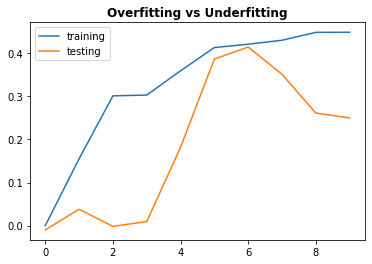

In [ ]:
np.random.seed(0)
n = 100
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
def answer_two():

    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    r2_train = np.zeros(shape=(10))
    r2_test = np.zeros(shape=(10))
   
    # Perhaps, a for loop would have been better
    #Polynomial expansion
    for degree in range(0,10):
      poly = PolynomialFeatures(degree=degree)
      
      #Applying standardization & reshaping(was giving an error!)
      X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

      X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
  
      #Fit the model
      linreg = LinearRegression().fit(X_train_poly, y_train)

      #Prediction
      y_pred = linreg.predict(X_train_poly)

      #Score
      training_score = linreg.score(X_train_poly, y_train)
      testing_score = linreg.score(X_test_poly, y_test)
      
      r2_train[degree]= training_score
      r2_test[degree] = testing_score

      #These were found by looking at the plot below, the results were consistent over multiple trials.Hence, hard coded.
      Underfitting= [1,2,3,4,5]
      Good_Generalization=[6]
      Overfitting=[7,8]
  
    return (r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)

#Checking the plot 
train, test,a,b,c = answer_two()
df = range(0,10)
import matplotlib.pyplot as plt

_=plt.plot(df,train, label = 'training')
_=plt.plot(df,test, label='testing')
_=plt.title('Overfitting vs Underfitting', fontweight='bold')
_=plt.legend(loc='best')
answer_two()

### Question 3 (10 points)

This question asks you to explore the influence of varying the training size proportion on the model's performance. Specifically, we hope you adopt the  train_size parameter in train_test_split function. 

Please use a for loop to repeat the following steps with `train_size` varying from `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`:
1. Generate synthetic data `(X_F1, y_F1)` using `make_friedman1` with `n_samples=1000, n_features=5, random_state=0`;
2. Apply `train_test_split` to split the generated synthetic data and got your `X_train, X_test, y_train, y_test` correspondingly. Please set `random_state=0` in`train_test_split` function to generate the data. 
3. Create a `LinearRegression` model
4. For each model compute the $R^2$ (coefficient of determination) regression score. 

Store the $R^2$ of each model in list `r_squared` and return the list. Do you see the $R^2$ increasing or decreasing? And why? 

*This function should return a list `r_squared`, with length 9.*


In [ ]:
def answer_three():
    from sklearn.datasets import make_friedman1
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    
    r_squared = []
    for train_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        # Data set
        X_F1, y_F1 = make_friedman1(n_samples=1000, n_features = 5, random_state=0)

        #Split data train/test
        X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0, train_size=train_size)

        #Linear regression model
        linreg = LinearRegression().fit(X_train, y_train)
        
        #R^2
        r_squared.append(linreg.score(X_test,y_test))

    
    return r_squared
'''As we increase the train size, our R^2 score increases as well given that we are putting more and more points in training the model. More points
Means better fit. But one of the drawbacks is that we might have no way of knowing whether our model will perform poorly on future observations (overfit). 
Hence, a better alternative in which we can use all points, and still retain realistics results would be to use cross-validation. '''
answer_three()

[0.738413532493281,
 0.7392569010143397,
 0.7513848505116703,
 0.745987907340038,
 0.7662066366447912,
 0.7760430184222654,
 0.7558631122685722,
 0.7797378250939616,
 0.7922372391817742]

### Question 4 (20 points)

This question asks you to compare the Linear Regression model and KNN Regression model. As you know, choosing the k in k-NN Regression model affects the prediction accuracy. In this question, train k-NN classifiers with `k = 1,2,...,5` (similar to HW1 Q5) and report the best performance of KNN Regression and Linear Regression. 

In this question we will fix the `train_size = 0.8`, you'll need to the following things:
1. Generate synthetic data `(X_F1, y_F1)` using `make_friedman1` with `n_samples=10000, n_features=10, random_state=0`;
2. Apply `train_test_split` to split the generated synthetic data and got your `X_train, X_test, y_train, y_test` correspondingly.Set `random_state=0` in`train_test_split` function to generate the data. 
3. Create a `LinearRegression` model and get its performenace.
4. Create a `KNeighborsRegressor` model and get the performance when `k = 1,5, 10, 15, 205`
5. Return the an array with 6 items: the first being the  `LinearRegression` model's $R^2$ and next 5 the `KNeighborsRegressor` models' $R^2$

*This function should return an array with 6 numbers.*

Which classifier performed the best?  Using the ideas from class, what could explain these results? 

In [ ]:
def answer_four():
    from sklearn.datasets import make_friedman1
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsRegressor
    
    scores = []
    k_range = [1,5, 10, 15, 205]

    # Data set
    X_F1, y_F1 = make_friedman1(n_samples=10000, n_features = 10, random_state=0)

    #Split data train/test
    X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0, train_size=0.80)

    #Linear reg model
    linreg= LinearRegression().fit(X_train, y_train)

    #Accuracy
    scores.append(linreg.score(X_test, y_test))

    for range in k_range:
      #KNN model
      knn = KNeighborsRegressor(n_neighbors=range).fit(X_train, y_train)

      #Accuracy
      scores.append(knn.score(X_test, y_test))
    return scores
'''The best performing model seems to be coming from the KNN regression with k=10. Altough, k=10 & k=15 yiled similar results, I picked the k=10
as the best favoring simplicity given not too much difference betweent the two accuracies. The main reason why KNN regression outperformed the linear one
could be the huge amount of data points that our training models has (10000). Also, given that KNN is non-parametric (no imposed strucutre on data), it could
be picking possible non-linear relationships in the predictor space.'''
answer_four()


[0.7430653473594293,
 0.667995745956579,
 0.8428177919919696,
 0.8554736492383892,
 0.8536243420979374,
 0.7354516334161025]

### Question 5 (20 points)

From Question 1 and 2 we have seen that we need to be careful when selecting the `degree` parameter of the polynomial feature expansion. These kind of parameters are ususally called "hyper-parameters" in machine learning. In this question, we will see how to make a good choice of the hyper-parameter(s). And when the dataset is small, cross validation can help us make a more reliable choice. 



In [ ]:
def answer_five():
    import numpy as np
    from sklearn.datasets import make_friedman3
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import cross_val_score

    # generate dta
    X_F3_train, y_F3_train = make_friedman3(n_samples=100, random_state=0)  # training set
    X_F3_test, y_F3_test = make_friedman3(n_samples=500, random_state=1)  # hold-out test set

    r2_cv = []
    r2_one_split = []
    for d in range(1, 6):
        
        #Transform `X_F3_train` to `X_F3_train_trans` using `PolynomialFeatures` with `degree=d`
        X_F3_train_trans = PolynomialFeatures(degree=d).fit_transform(X_F3_train)

        # train and evaluate with one split
        X_train, X_valid, y_train, y_valid = train_test_split(X_F3_train_trans, y_F3_train, random_state=0, test_size=0.1)
        linreg = LinearRegression().fit(X_train, y_train)
        r2_one_split.append(linreg.score(X_valid, y_valid))

        # train and evaluate with cross validation
        linreg = LinearRegression()

        #Get `cv_scores` by applying `cross_val_score` on `linreg, X_F3_train_trans, y_F3_train` with `cv=10`
        cv_scores=cross_val_score(linreg, X_F3_train_trans, y_F3_train, cv=10)
        r2_cv.append(np.mean(cv_scores))

    # evalutate on the hold-out test set
    d_one_split = np.argmax(r2_one_split)+1  # get the best degree on the one-split validation set
    poly = PolynomialFeatures(degree=d_one_split)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_one_split = linreg.score(X_F3_test_trans, y_F3_test)
    print('One split:\tDegree {}, R-squared score {:.3f}'
         .format(d_one_split, linreg.score(X_F3_test_trans, y_F3_test)))

    d_cv = np.argmax(r2_cv)+1  # get the best degree on the cross validation set
    poly = PolynomialFeatures(degree=d_cv)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_cv = linreg.score(X_F3_test_trans, y_F3_test)
    print('Cross Valid:\tDegree {}, R-squared score {:.3f}'
         .format(d_cv, linreg.score(X_F3_test_trans, y_F3_test)))
    
    return (d_one_split, score_one_split, d_cv, score_cv)

answer_five()

One split:	Degree 3, R-squared score 0.239
Cross Valid:	Degree 2, R-squared score 0.751


(3, 0.23923438205081637, 2, 0.7508642440825726)

In [ ]:
### Question 6 (10 points)
In class and in the lab, we have studied the polynomial feature expansion. In this question, we hope you to write out the polynomial features after expansion when given different number of features and different degrees. 

In this question, you need to answer the number of feature after polynomial feature expansion to a train data with 4 features with degree 2. Assumer the original features are [a, b, c, d], please tell us what the features are after polynomial feature expansion (order doesn't matter) and number of features. 

Bascially, you need to answer with a list containing [a, b, ...] representation the features after expansion and a number denoting the total number of features after expansion. 

*Note that we hope you calculate this question by hand, not use python*

''' 
formula = (v+d)C(d) v = variables, d=degree --> 6C2 = 15
[a,b,c,d]
  [1]
  [a,b,c,d]
  [ab, ac, ad, bc, bd, cd]
  [a^2, b^2, c^2, d^2]
Hence, [1, a,b,c,d,ab, ac, ad, bc, bd, cd,a^2, b^2, c^2, d^2] with a total of 15 terms
'''

#Some code to confirm the results
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
#Features 4
X = np.array([[1,1,3,4]])
#Degree 2
X_poly = PolynomialFeatures(degree=2).fit_transform(X)
#Size 15
(X_poly.size)

15